# Forecasting Sales with Prophet and Time Series Analysis

In [2]:
import pandas as pd
# Set the option to display all columns
pd.set_option('display.max_columns', None)
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
sns.set_style('whitegrid')
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline 
import plotly.express as px           # For interactive plots
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
import gc
import datetime

In [3]:
# load the dataset
df=pd.read_csv("train.csv")

In [4]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df.shape

(1017209, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
# datetime
df['Date'] = pd.to_datetime(df['Date'])
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [8]:
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
# To check any duplicate rows
df.duplicated().sum()

0

### Basic Statistical Details and Visualization

In [11]:
#numerical Columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,1017209.0,558.429727,1.0,280.0,558.0,838.0,1115.0,321.908651
DayOfWeek,1017209.0,3.998341,1.0,2.0,4.0,6.0,7.0,1.997391
Date,1017209,2014-04-11 01:30:42.846061824,2013-01-01 00:00:00,2013-08-17 00:00:00,2014-04-02 00:00:00,2014-12-12 00:00:00,2015-07-31 00:00:00,NaN
Sales,1017209.0,5773.818972,0.0,3727.0,5744.0,7856.0,41551.0,3849.926175
Customers,1017209.0,633.145946,0.0,405.0,609.0,837.0,7388.0,464.411734
Open,1017209.0,0.830107,0.0,1.0,1.0,1.0,1.0,0.375539
Promo,1017209.0,0.381515,0.0,0.0,0.0,1.0,1.0,0.485759
SchoolHoliday,1017209.0,0.178647,0.0,0.0,0.0,0.0,1.0,0.383056


<Axes: ylabel='Sales'>

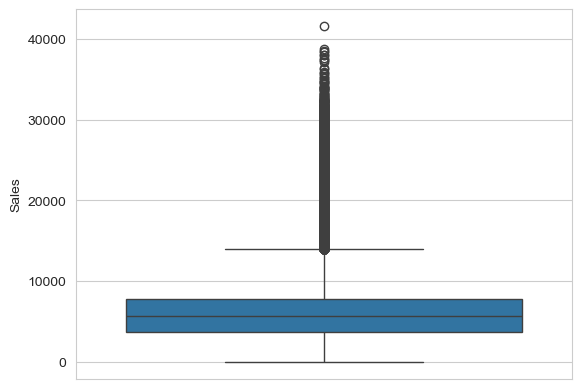

In [12]:
# use boxplot to check outliers in Price
sns.boxplot(df.Sales)

In [13]:
# check for outliers
print('skew:',df['Sales'].skew())
print('kurtosis:',df['Sales'].kurtosis())

skew: 0.6414596158103787
kurtosis: 1.7783747472372768


<Axes: ylabel='Sales'>

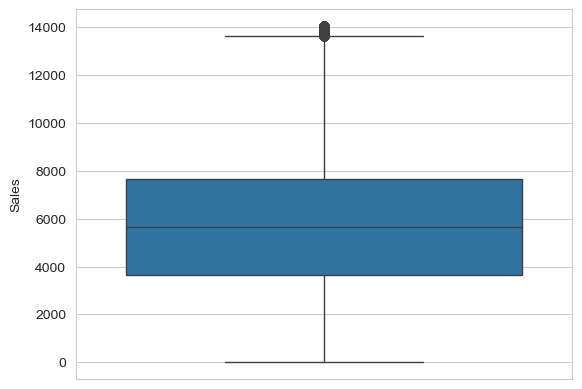

In [14]:
# Remove outliers
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df1 = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]
sns.boxplot(df1.Sales)

### Distribution of Sales

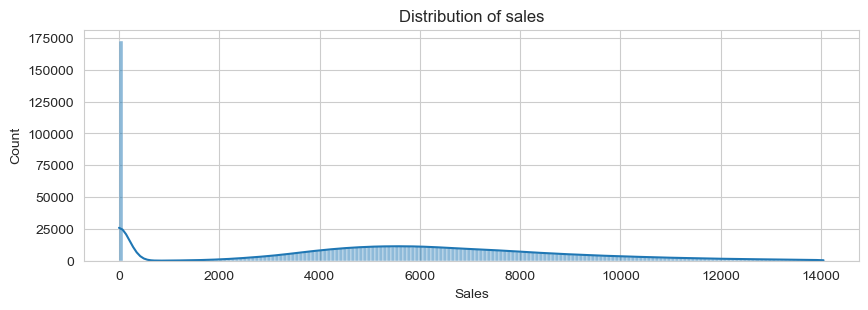

In [16]:
# distribution of Sales
plt.figure(figsize=(10,3))
sns.histplot(df1.Sales,kde=True)
plt.title('Distribution of sales') 
plt.show()

#### Key Findings from Sales Distribution

1. **Right-Skewed Distribution**:
   - The sales data exhibits a right-skewed distribution, with a majority of sales values clustered at the lower end.

2. **Concentration of Low Sales**:
   - Most transactions occur below 2000 in sales, indicating that lower sales values are more common.

3. **Long Tail with Higher Sales**:
   - There is a gradual decline in frequency as sales values increase, with a long tail extending beyond 6000, showing fewer higher-valer4analysis.

5. **Potential for Sales Growth**:
   - The data indicates opportunities to explore strategies to increase the frequency of higher sales 5ransactions.

6. **Implications for Analysis**:
   - Given the skewness, consider using data transformation techniques or robust statistical methods for further modeling and analysis.

### Sales Over time

In [19]:
# Count the number of sales entries per day
sales_per_day = df1.groupby('Date')['Sales'].sum().reset_index()
sales_per_day

,Date,Sales
0,2013-01-01,79968
1,2013-01-02,6650214
2,2013-01-03,6156554
3,2013-01-04,6435711
4,2013-01-05,5683656
...,...,...
937,2015-07-27,9185332
938,2015-07-28,8390434
939,2015-07-29,8005273
940,2015-07-30,8148233


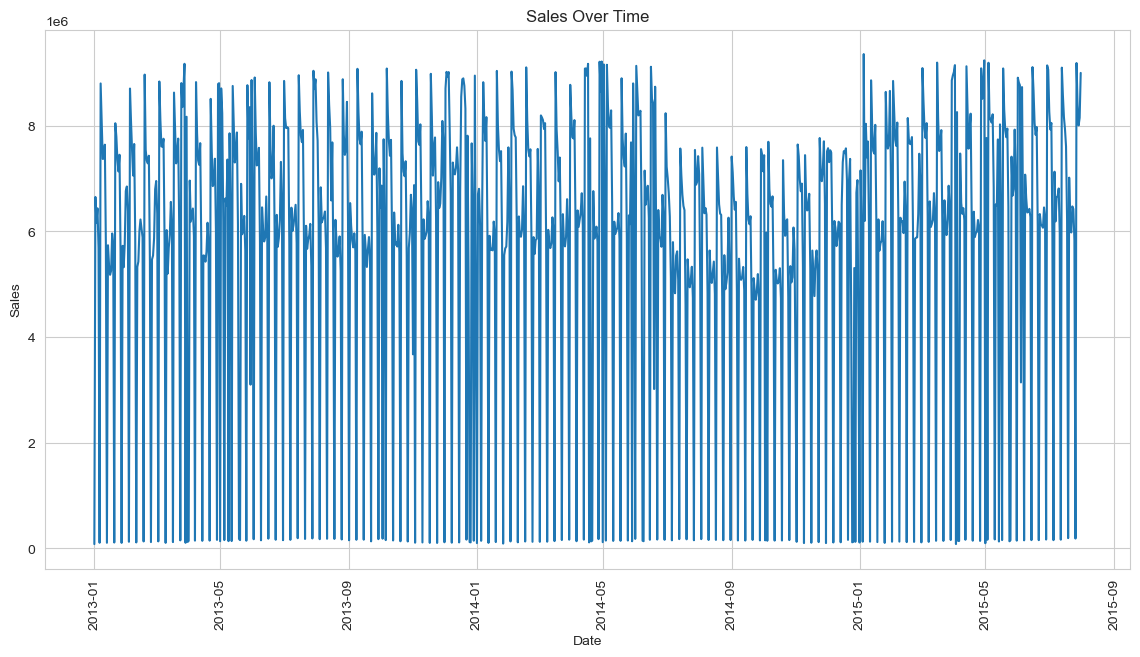

In [20]:
# Sales Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_per_day, x='Date', y='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=90) 
plt.savefig('1')
plt.show()

## Model Development and Evaluation
### Forecast Model Using Prophet

In [22]:
# Step 1 - First we import the Prophet class from fbprophet module and then create an instance of this.
from prophet import Prophet
model = Prophet()

In [23]:
# step 2 - Note that Prophet requires the date column as 'ds' and outcome varible as 'y'. So we change this in our dataframe and check its data
pro_df = df1[["Date","Sales"]]
pro_df.columns = ['ds','y']
pro_df.head()

,ds,y
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822


In [24]:
# Fit the model
model.fit(pro_df)

11:43:42 - cmdstanpy - INFO - Chain [1] start processing
11:47:31 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
# Step 4: Create Future DataFrame for Predictions
# Create a future DataFrame for 30 days ahead
future = model.make_future_dataframe(periods=30)  # Change 30 to any number of days you want to predict

In [50]:
# Step 5: Make Predictions
# Generate forecast
forecast = model.predict(future)

In [52]:
# Step 6 - We check the forecast data has several components - trend, weakly and yearly seasonality - and for each of these components, we have the lower and upper confidence intervals data.
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,5185.443753,2433.679057,8732.528715,5185.443753,5185.443753,533.995711,533.995711,533.995711,1188.153053,1188.153053,1188.153053,-654.157342,-654.157342,-654.157342,0.0,0.0,0.0,5719.439464
1,2013-01-02,5189.611170,2190.864616,8559.631471,5189.611170,5189.611170,175.146161,175.146161,175.146161,835.137635,835.137635,835.137635,-659.991474,-659.991474,-659.991474,0.0,0.0,0.0,5364.757331
2,2013-01-03,5193.778587,1994.943069,8199.973760,5193.778587,5193.778587,-125.910265,-125.910265,-125.910265,529.381774,529.381774,529.381774,-655.292039,-655.292039,-655.292039,0.0,0.0,0.0,5067.868322
3,2013-01-04,5197.946004,2438.418998,8704.508450,5197.946004,5197.946004,348.866071,348.866071,348.866071,989.598785,989.598785,989.598785,-640.732714,-640.732714,-640.732714,0.0,0.0,0.0,5546.812076
4,2013-01-05,5202.113422,1819.497264,8137.507993,5202.113422,5202.113422,-460.280692,-460.280692,-460.280692,156.865691,156.865691,156.865691,-617.146382,-617.146382,-617.146382,0.0,0.0,0.0,4741.832730


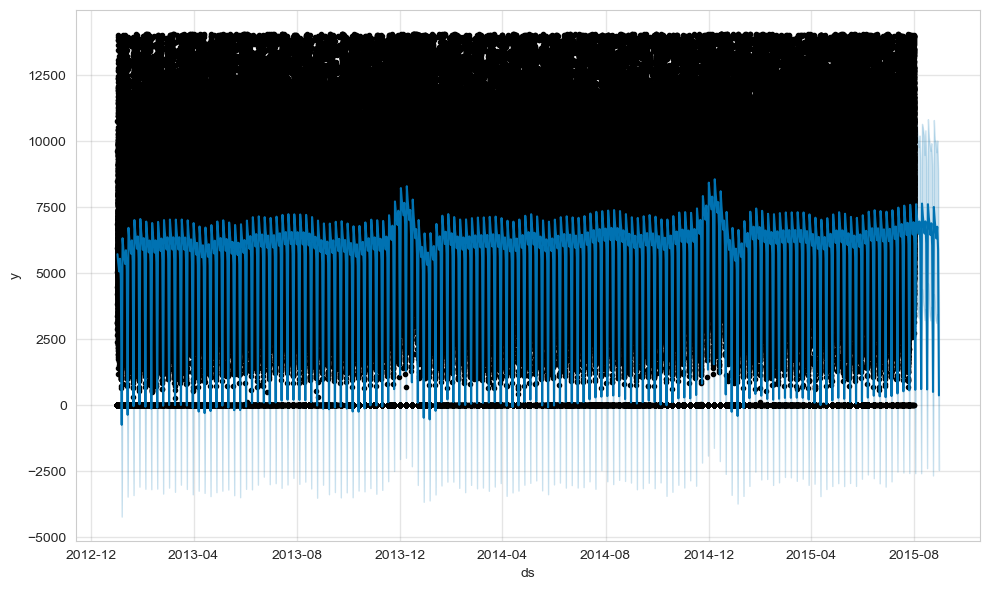

In [54]:
# Plot the forecast
fig = model.plot(forecast)

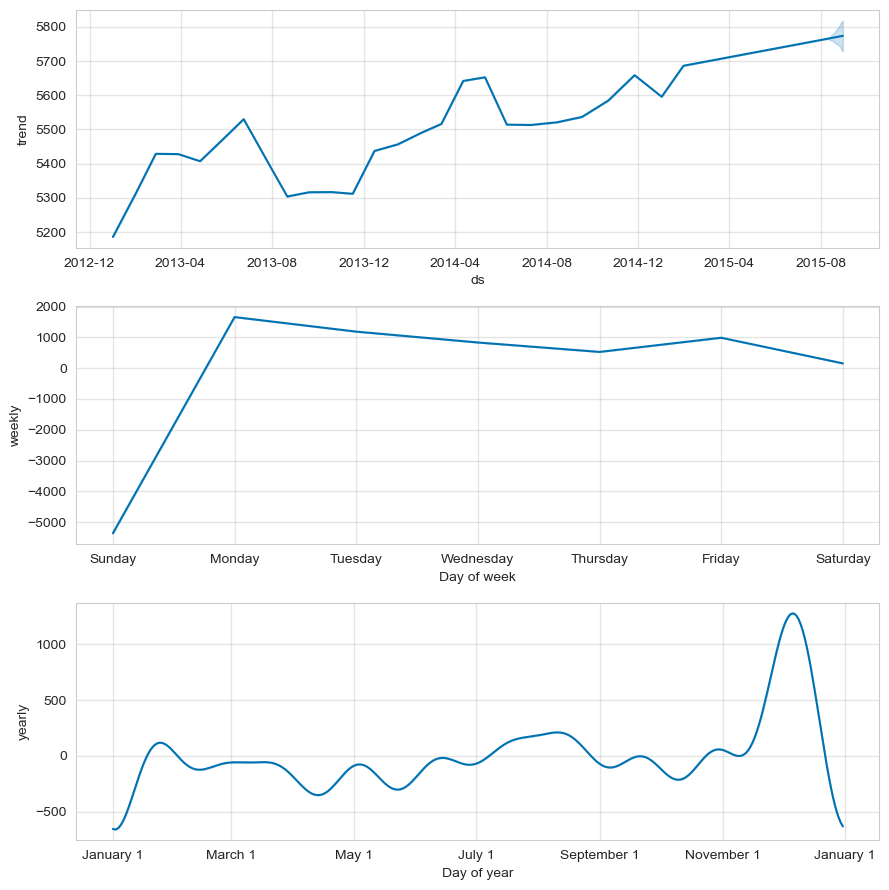

In [56]:
#visualize the components
fig2 = model.plot_components(forecast)

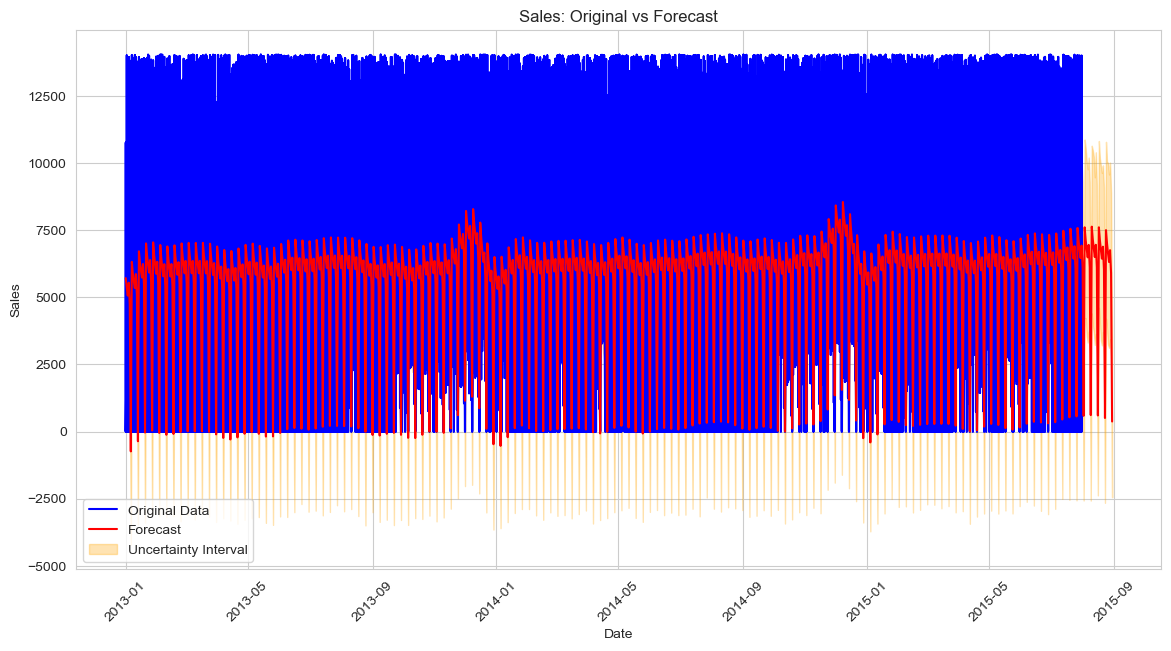

In [58]:
# Step 7 - Then, we visualize the original and forecast data alongside each other
#Plot the original data and the forecast together
plt.figure(figsize=(14, 7))

# Plot the original data
plt.plot(pro_df['ds'], pro_df['y'], label='Original Data', color='blue', linestyle='-')

# Plot the forecast data
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red', linestyle='-')

# Plot the uncertainty intervals
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.3, label='Uncertainty Interval')

# Customize the plot
plt.title('Sales: Original vs Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()

#### Key Findings: Sales Forecast vs. Original Data

1. **Close Alignment**:
   - The forecast closely follows the original sales data, indicating a good model fit.

2. **Seasonal Patterns**:
   - There are clear seasonal fluctuations visible in both the original and forecasted sales data, suggesting predictable periodic trends.

3. **Forecast Accuracy**:
   - The forecast line (red) generally aligns well with the actual data (blue), indicating reliable predictive performance.

4. **Uncertainty Interval**:
   - The uncertainty interval (shaded area) captures most of the variability in the sales data, providing a robust confidence range for predictions.

5. **Potential Anomalies**:
   - Some deviations between the forecast and actual data could indicate anomalies or unexpected events affecting sales.

6. **Implications for Planning**:
   - The model's accuracy and the identification of seasonal trends can support effective sales planning and inventory management.